# Trabajo Práctico 2 Aprendizaje de Máquina 2021 UNS

## Ejercicio 1  
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv están  datasets  de  la  situación  epidemiológica  y  sanitaria  relacionada  con  el  covid  en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).   
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.  
* Hay  variables  que  puedan  ser  razonablemente  consideradas  normales?   
* Hay  variables que tienen un comportamiento sospechoso? 

### 2.1.1 Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.2 Lectura de datos con pandas

In [2]:
casos = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
camas = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')

#### 2.1.3 Forma y contenido de los datos

In [3]:
print(casos.shape)
print(camas.shape)
display(casos)

(88, 11)
(88, 19)


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


In [4]:
casos.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


In [5]:
camas.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


### 2.1.4 Gráfico de destribuciones de probabilidad de los datos

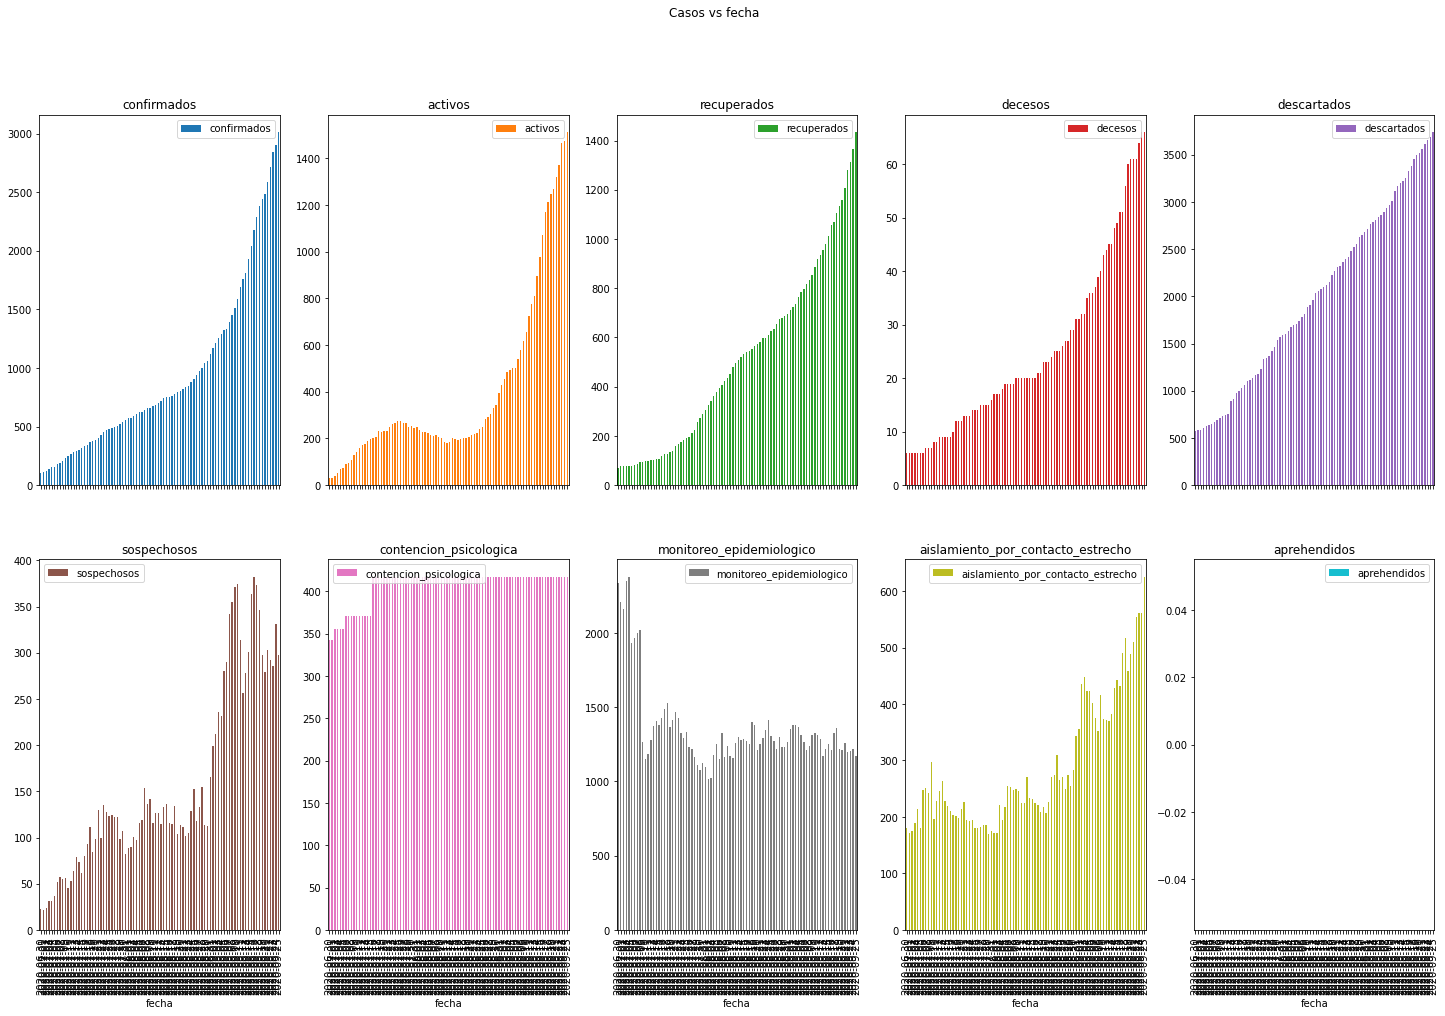

In [48]:
casos.plot(   kind = 'bar',
                 x = 'fecha',
                 subplots = True,
                 layout = (2, 5),
                 figsize=(25,15),
                 title='Casos vs fecha')
plt.show()

Podemos observar cómo varias variables tienen una tendencia muy similar de incremento casi exponencial, sobre todo en la segunda mitad de los gráficos. Una variable importante es el monitoreo, que baja cuando más casos hay, pudiendo indicar que aún más casos de los reportados podrían estarse ignorando.

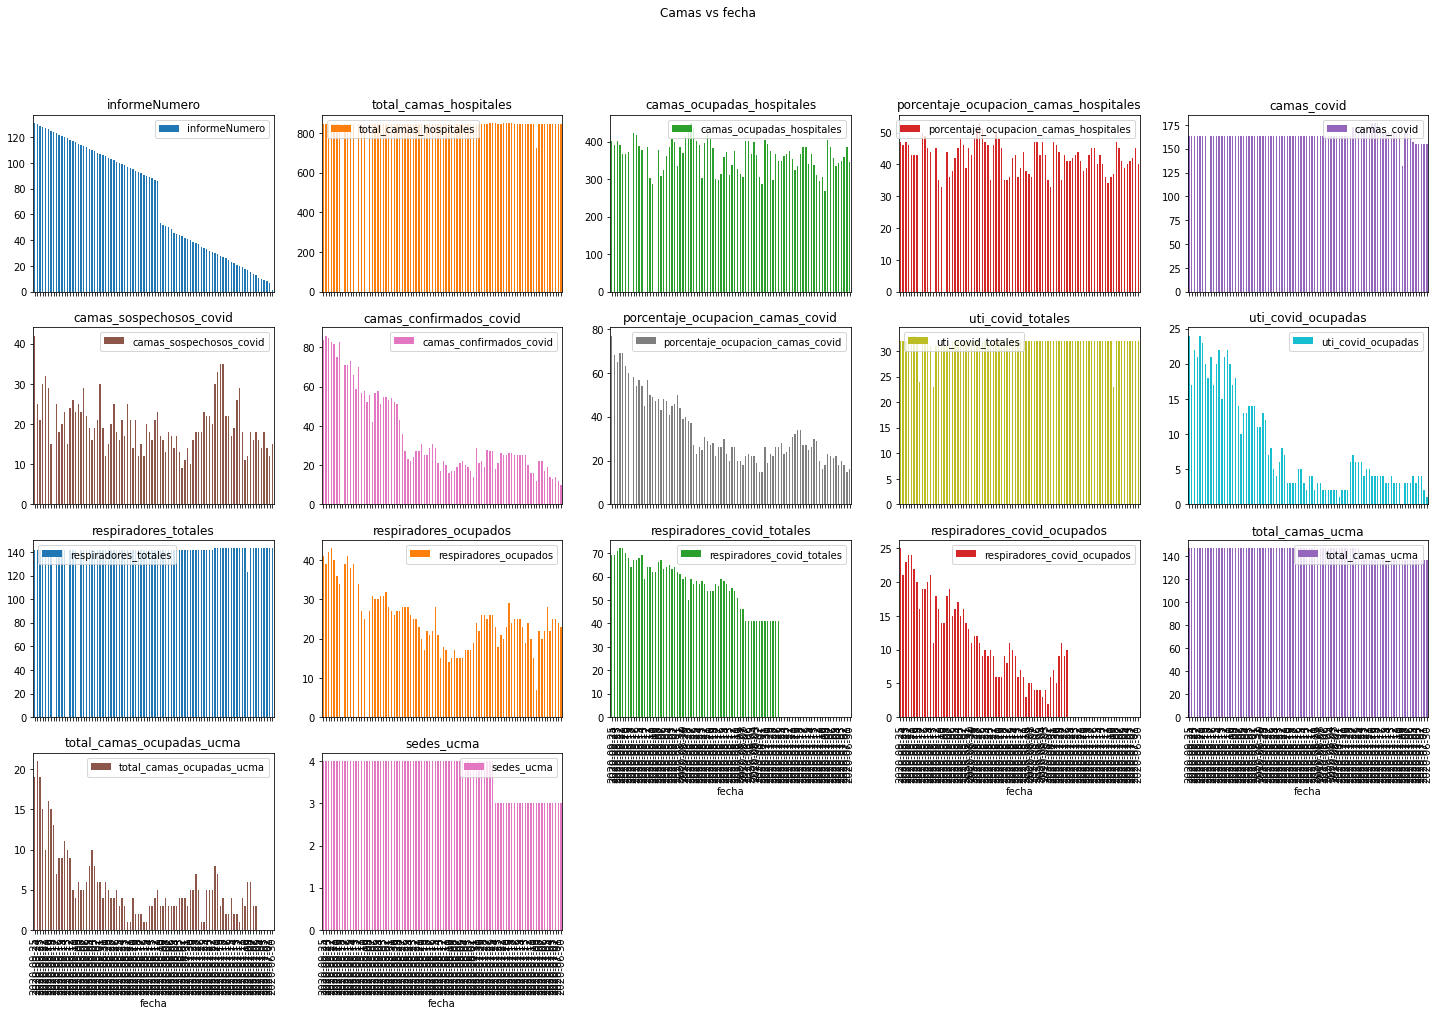

In [49]:
camas.plot(   kind = 'bar',
                 x = 'fecha',
                 subplots = True,
                 layout = (4, 5),
                 figsize=(25,15),
                 title='Camas vs fecha')
plt.show()

### 2.1.5 Correlación entre los datos

In [8]:
# Generamos la matriz de correlación
corr_casos = casos.corr()
corr_casos

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
confirmados,1.000000,0.971515,0.970991,0.995321,0.930099,0.887655,0.468243,-0.380473,0.931577,NaN
activos,0.971515,1.000000,0.886670,0.951486,0.823902,0.846492,0.371957,-0.323159,0.913856,NaN
recuperados,0.970991,0.886670,1.000000,0.981841,0.983296,0.877261,0.537776,-0.416033,0.895765,NaN
decesos,0.995321,0.951486,0.981841,1.000000,0.952949,0.902620,0.501630,-0.398059,0.922416,NaN
descartados,0.930099,0.823902,0.983296,0.952949,1.000000,0.877521,0.641052,-0.495461,0.840620,NaN
sospechosos,0.887655,0.846492,0.877261,0.902620,0.877521,1.000000,0.516886,-0.385521,0.855514,NaN
contencion_psicologica,0.468243,0.371957,0.537776,0.501630,0.641052,0.516886,1.000000,-0.765595,0.295824,NaN
monitoreo_epidemiologico,-0.380473,-0.323159,-0.416033,-0.398059,-0.495461,-0.385521,-0.765595,1.000000,-0.231727,NaN
aislamiento_por_contacto_estrecho,0.931577,0.913856,0.895765,0.922416,0.840620,0.855514,0.295824,-0.231727,1.000000,NaN
aprehendidos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


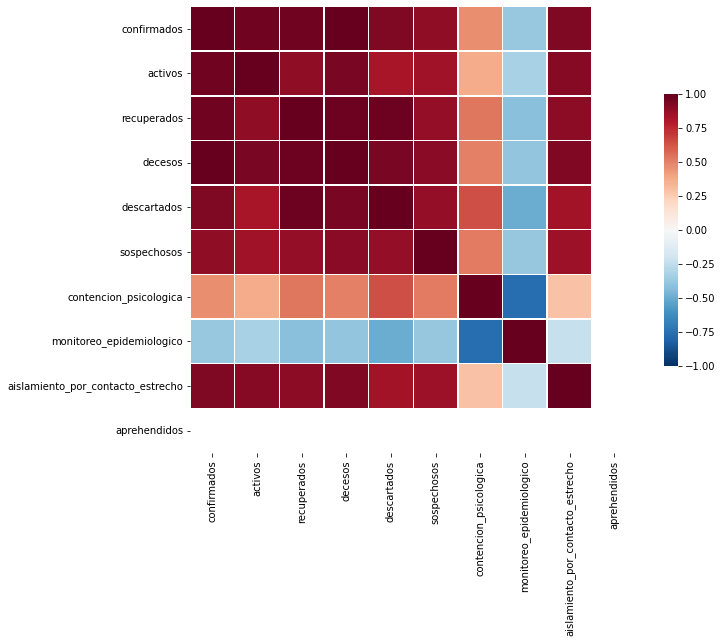

In [9]:
# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(10, 10))

# Dibujamos el heatmap con una paleta de color divergente
sns.heatmap(corr_casos, cmap='RdBu_r', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Podemos observar que lo que podía verse en los anteriores gráficos, la relación de varias variables incrementándose de manera similar, este gráfico de correlación lo expresa más explícitamente. A su vez, se ve también la correlación inversa entre casos de covid y testeo, lo cual es muy importante

In [10]:
# Generamos la matriz de correlación
corr_camas = camas.corr()
corr_camas

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
informeNumero,1.000000,-0.204881,-0.038060,-0.047196,-0.161565,0.209801,0.763776,0.720205,-0.109526,0.788308,-0.218511,0.394656,0.925223,0.905643,0.768908,0.597903,0.768908
total_camas_hospitales,-0.204881,1.000000,0.865172,0.861303,0.563654,0.193063,-0.007710,0.035703,0.713251,-0.217070,0.999798,0.555186,-0.135149,-0.121024,-0.102102,-0.196383,-0.102102
camas_ocupadas_hospitales,-0.038060,0.865172,1.000000,0.997291,0.486649,0.220108,0.147249,0.176738,0.662210,-0.066009,0.862858,0.630708,-0.006790,0.019879,0.000321,-0.048575,0.000321
porcentaje_ocupacion_camas_hospitales,-0.047196,0.861303,0.997291,1.000000,0.475294,0.214614,0.140780,0.171627,0.624646,-0.074930,0.859255,0.618723,-0.016321,0.013001,-0.008410,-0.044701,-0.008410
camas_covid,-0.161565,0.563654,0.486649,0.475294,1.000000,0.422852,0.164243,0.229300,0.608561,-0.151015,0.563477,0.317040,-0.145277,-0.143943,-0.102607,-0.182243,-0.102607
camas_sospechosos_covid,0.209801,0.193063,0.220108,0.214614,0.422852,1.000000,0.454578,0.621436,0.263869,0.395165,0.191979,0.472723,0.037061,0.257484,-0.087753,0.292426,-0.087753
camas_confirmados_covid,0.763776,-0.007710,0.147249,0.140780,0.164243,0.454578,1.000000,0.978814,0.050375,0.898228,-0.015609,0.687993,0.633210,0.860472,0.436314,0.750525,0.436314
porcentaje_ocupacion_camas_covid,0.720205,0.035703,0.176738,0.171627,0.229300,0.621436,0.978814,1.000000,0.091535,0.877722,0.028651,0.708697,0.569333,0.818102,0.364198,0.723638,0.364198
uti_covid_totales,-0.109526,0.713251,0.662210,0.624646,0.608561,0.263869,0.050375,0.091535,1.000000,-0.131759,0.711334,0.477316,-0.039160,-0.054077,-0.001441,-0.185027,-0.001441
uti_covid_ocupadas,0.788308,-0.217070,-0.066009,-0.074930,-0.151015,0.395165,0.898228,0.877722,-0.131759,1.000000,-0.224636,0.565112,0.637895,0.886643,0.427267,0.741938,0.427267


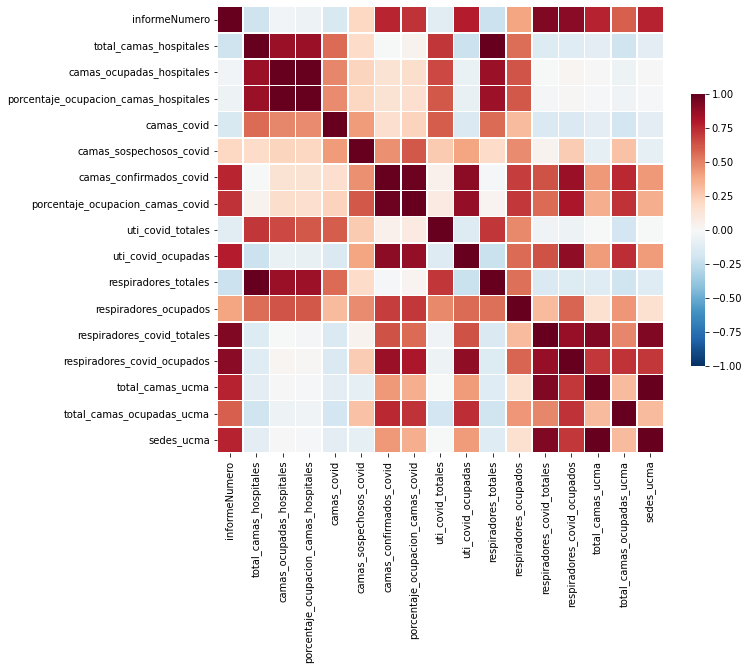

In [11]:
# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(10, 10))

# Dibujamos el heatmap con una paleta de color divergente
sns.heatmap(corr_camas, cmap='RdBu_r', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 2.1.6 Detección de outliers

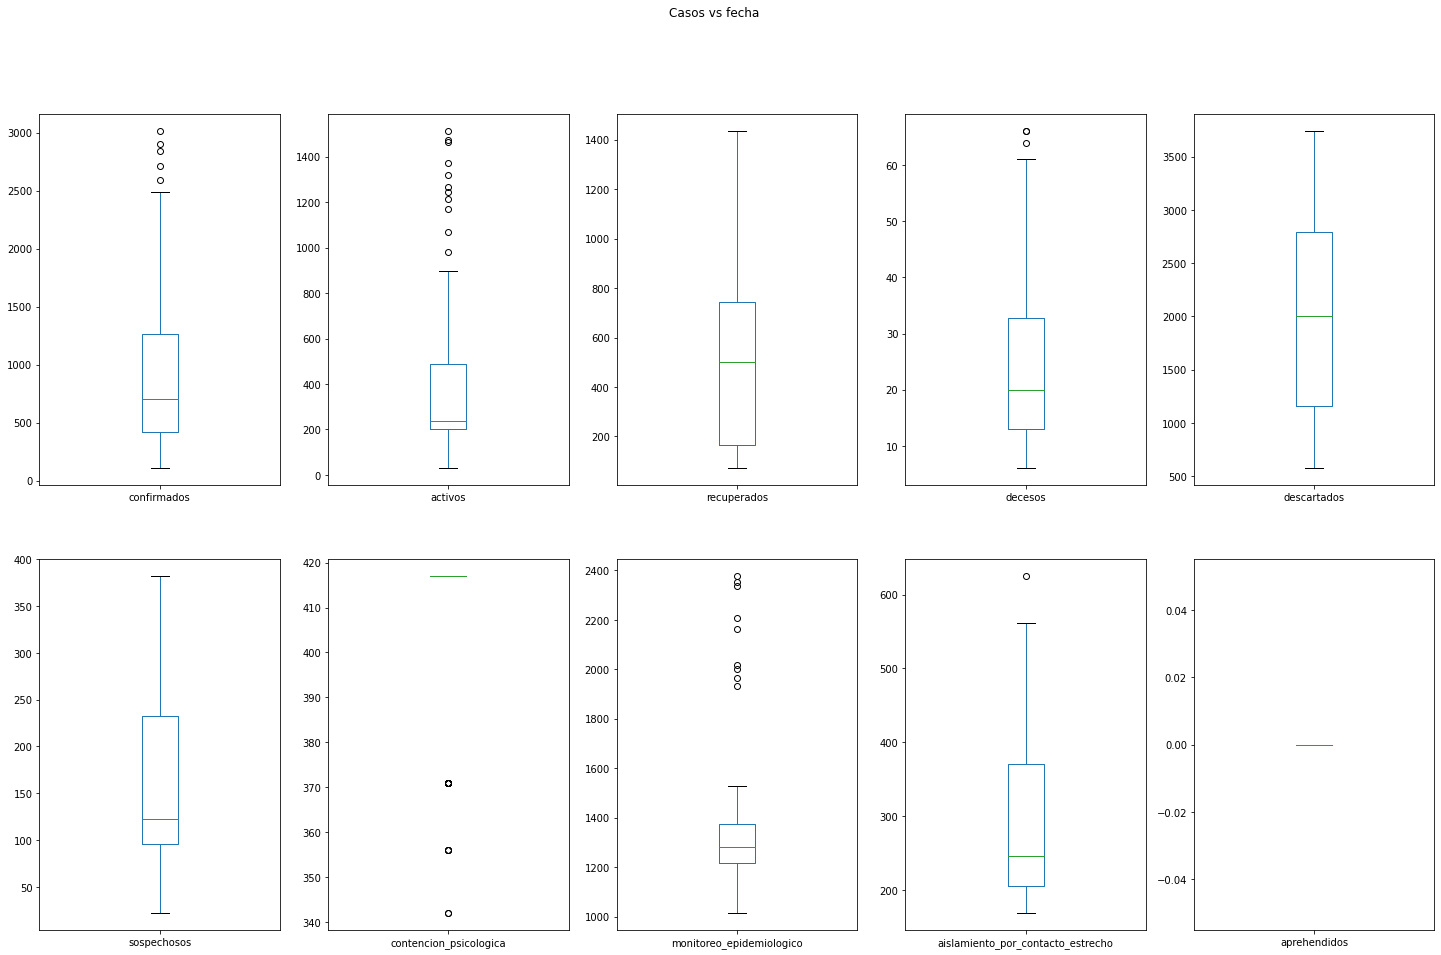

In [12]:
casos.plot(   kind = 'box',
                 x = 'fecha',
                 subplots = True,
                 layout = (2, 5),
                 figsize=(25,15),
                 title='Casos vs fecha')
plt.show()

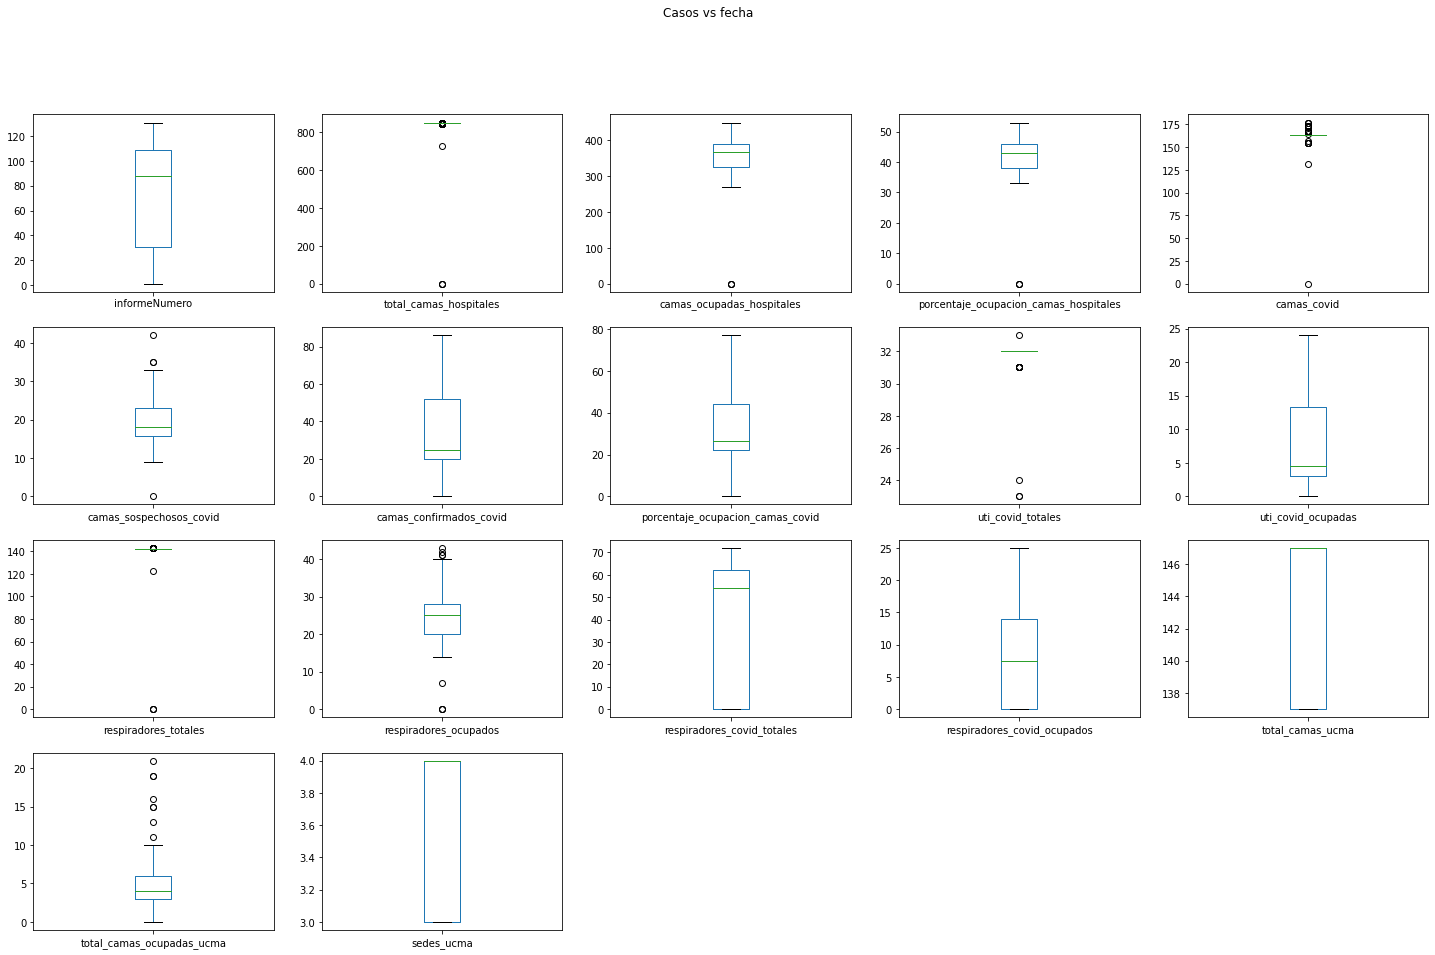

In [13]:
camas.plot(   kind = 'box',
                 x = 'fecha',
                 subplots = True,
                 layout = (4, 5),
                 figsize=(25,15),
                 title='Casos vs fecha')
plt.show()

En estos gráficos podemos observar que hay algunas fechas que tienen datos muy alejados de la media. Estos datos (marcados con círculos) podrían analizarse con detalle para determinar si pueden eliminarse del dataset, ya que pueden ser fechas aisladas con problemas (por ejemplo, una carga tardía de datos) y confundiría en el caso de entrenar un modelo de predicción.

### 2.1.7 Análisis de datos más importantes de los dos datasets en conjunto

Los datos más importantes que se considerar son el total de camas ocupadas respecto al total de camas para observar si se saturó el sistema y la relación entre casos de covid y camas ocupadas para realizar proyecciones.

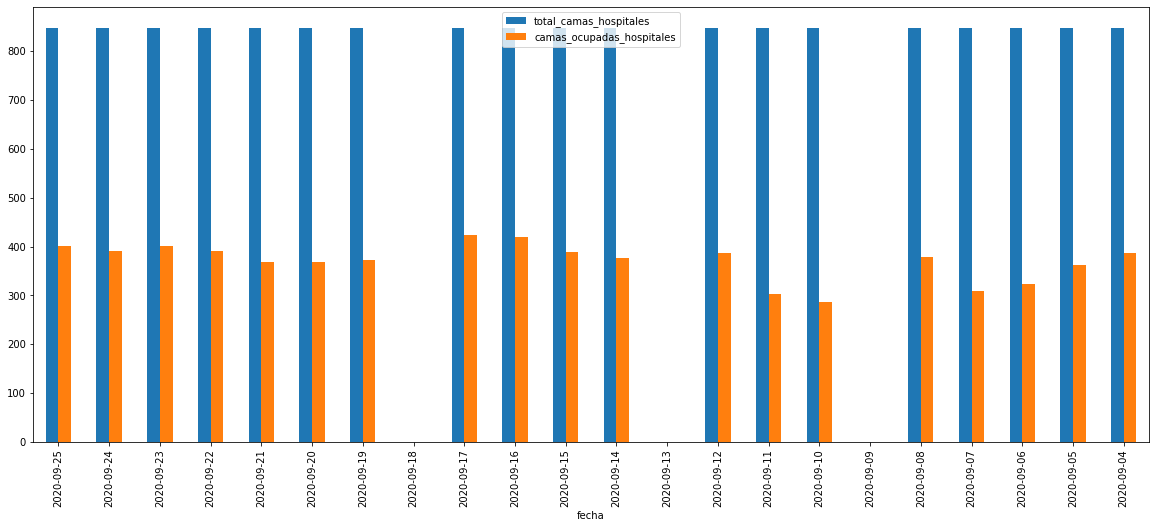

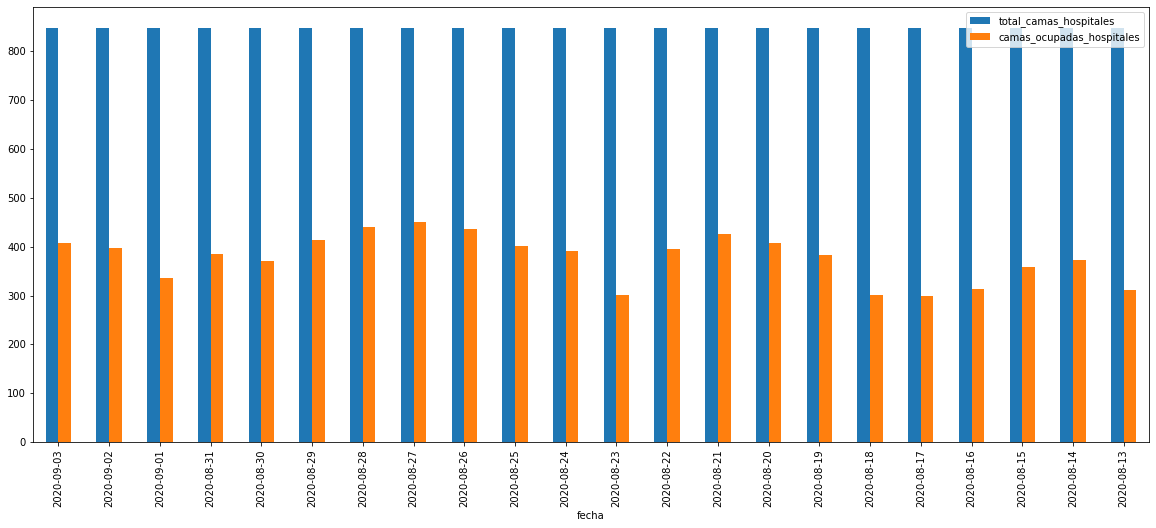

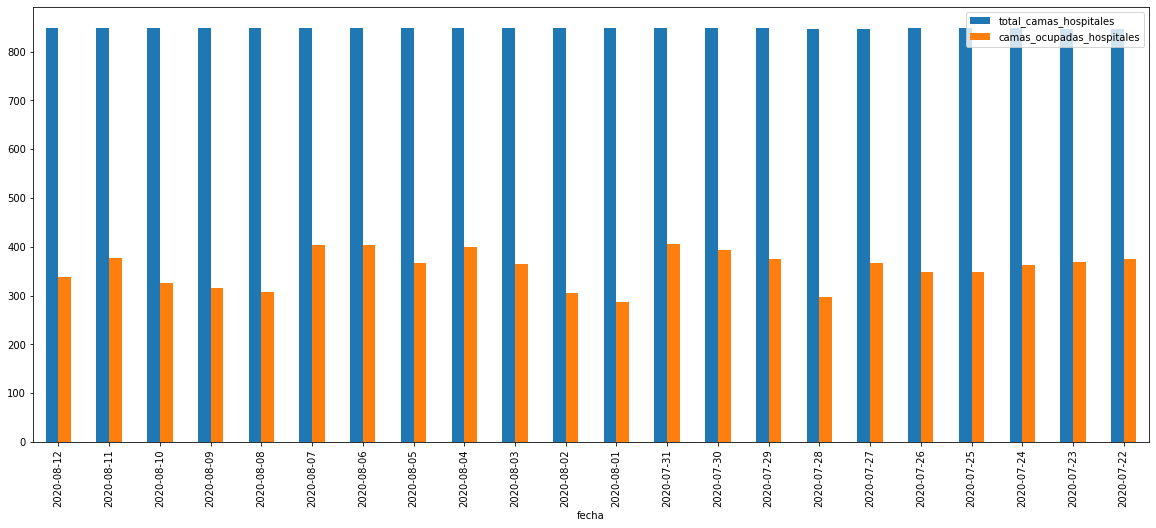

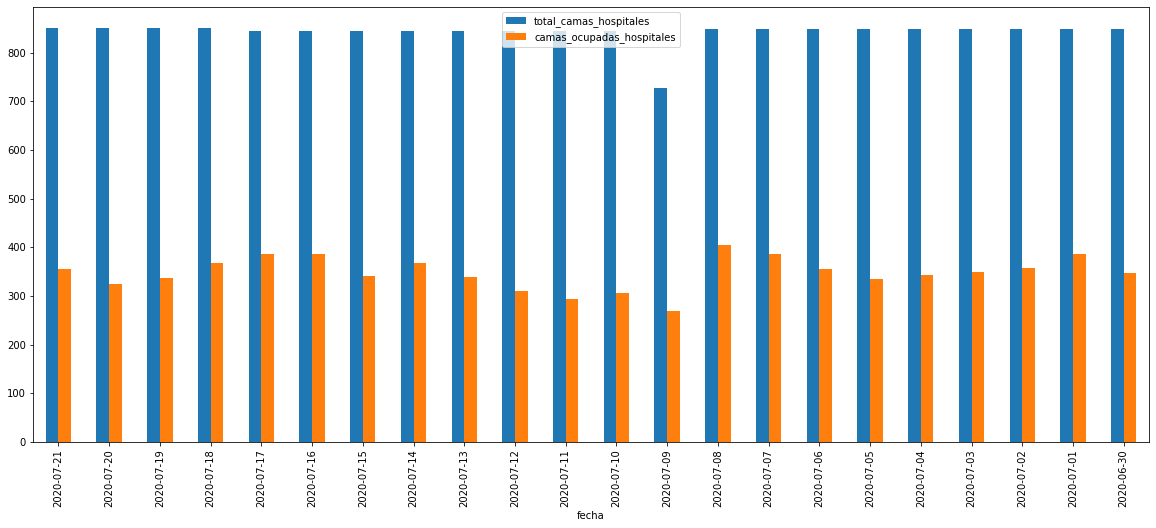

In [14]:
divisions = 4

for i in range(divisions):
  camas[i*(len(camas)//divisions):(i+1)*(len(camas)//divisions)].plot(kind = 'bar',
                                          x = 'fecha',
                                          y = ['total_camas_hospitales','camas_ocupadas_hospitales'],
                                    figsize = (20,8),
                                     legend = True)
  plt.show()

In [46]:
joint_df = camas.join(casos['activos'])
joint_df = joint_df.join(casos['decesos'])

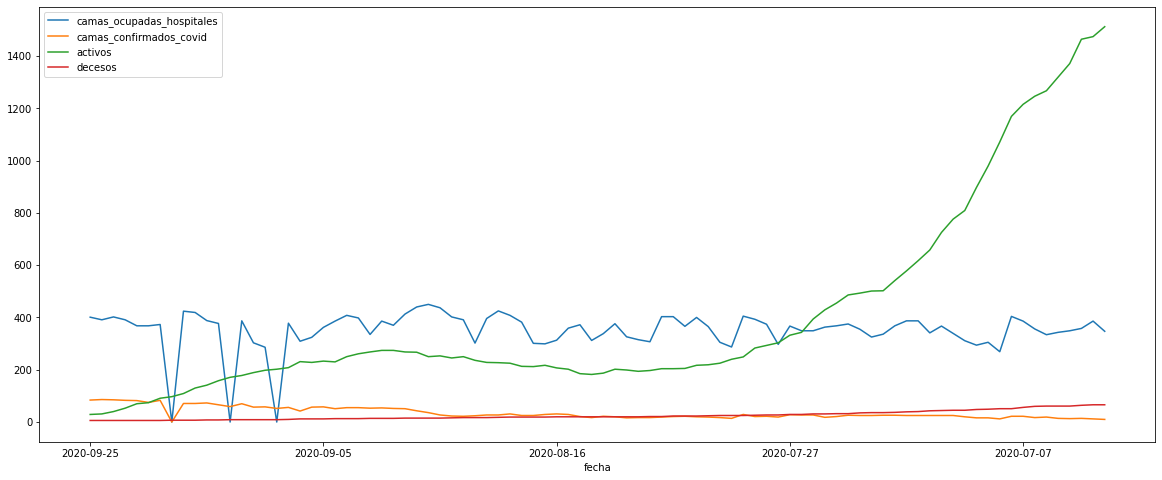

In [47]:
joint_df.plot(kind = 'line',
                 x = 'fecha',
                 y = ['camas_ocupadas_hospitales','camas_confirmados_covid','activos','decesos'],
                 figsize=(20,8),
                 legend = True)

### 1.2.6 Conclusiones

* En el gráfico de total de camas y camas ocupadas podemos observar que las camas ocupadas nunca superan las camas totales, por lo que el sistema de salud no se saturó.
* En el gráfico de activos, decesos y camas ocupadas podemos observar que si bien aumentaron los casos y los decesos, las camas ocupadas por el covid no parece tener correlación con los mismos.

# Ejercicio 2

Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos  Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).  
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).  
* Recalcular para algunas variantes (por ejemplo, acercando las 
medias de los grupos A y B, cambiando el valor umbral, etc.).  
* Cómo podrían hacer no supervisado este proceso?

In [17]:
from scipy.stats import norm

### 2.2.1 Generación de los Datasets

In [18]:
N = 50

mu_A = 0
sigma_A = 2

mu_B = 3
sigma_B = 5

In [19]:
A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(N, 1)),columns=['dato'])
A_df['etiqueta'] = 'A'

B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(N, 1)),columns=['dato'])
B_df['etiqueta'] = 'B'

### 2.2.2 Gráficos de los datasets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ditribución de los datos')

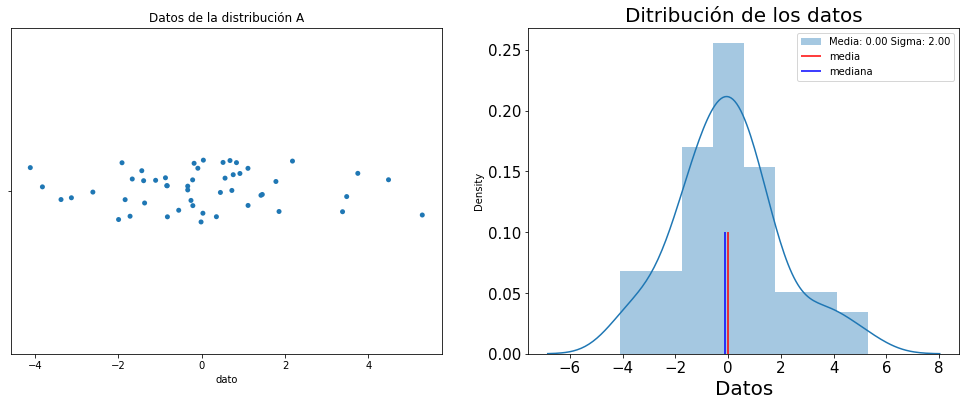

In [20]:
plt.figure (figsize=(17,6))

plt.subplot(121)
sns.stripplot(x=A_df["dato"])
plt.title('Datos de la distribución A')

plt.subplot(122)
sns.distplot(A_df['dato'], label='Media: %1.2f Sigma: %1.2f'%(mu_A,sigma_A))
plt.vlines(A_df['dato'].mean(),0.0,0.1,'r',label='media')
plt.vlines(A_df['dato'].median(),0.0,0.1,'b',label='mediana')
plt.legend(fontsize=10)
plt.xlabel(r"Datos", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Ditribución de los datos', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ditribución de los datos')

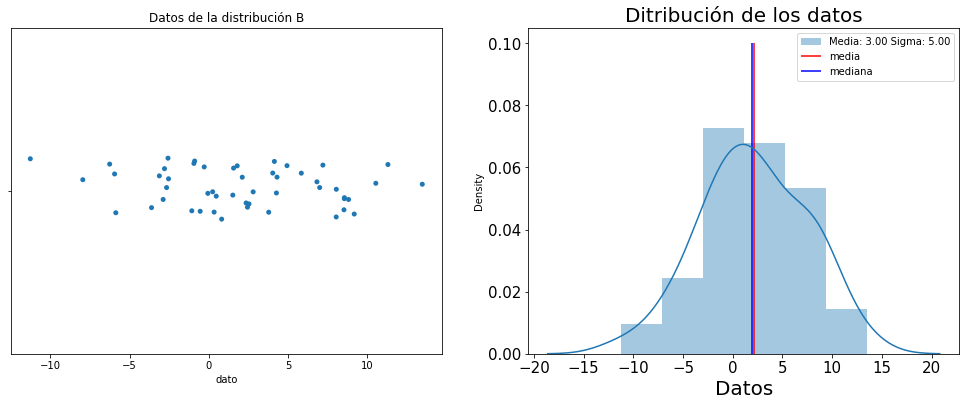

In [21]:
plt.figure (figsize=(17,6))

plt.subplot(121)
sns.stripplot(x=B_df["dato"])
plt.title('Datos de la distribución B')

plt.subplot(122)
sns.distplot(B_df['dato'],label='Media: %1.2f Sigma: %1.2f'%(mu_B,sigma_B))
plt.vlines(B_df['dato'].mean(),0.0,0.1,'r',label='media')
plt.vlines(B_df['dato'].median(),0.0,0.1,'b',label='mediana')
plt.legend(fontsize=10)
plt.xlabel(r"Datos", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Ditribución de los datos', fontsize=20)

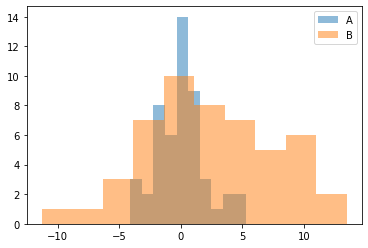

In [22]:
plt.hist(A_df['dato'], label = "A", alpha=0.5)
plt.hist(B_df['dato'], label = 'B', alpha=0.5)
plt.legend(labels = ['A','B'])
plt.show()

### 2.2.3 Curva ROC  


In [36]:
AB_df = pd.concat([A_df,B_df])

In [24]:
AB_df.sort_values('dato',inplace=True, ignore_index=True)

In [25]:
TPR = []
FPR = []
TN = []
FN = []

TP = 0
FP = 0
for i in range(len(AB_df)):
  if (AB_df.iloc[i,1] == 'A'):
    TP +=1
  else:
    FP +=1

  TPR.append(TP/(len(AB_df)/2))
  FPR.append(FP/(len(AB_df)/2))
  TN.append((len(AB_df)/2) - FP)
  FN.append((len(AB_df)/2) - FP)
  
# Punto de mayor distancia
dist = abs((np.array(FPR) - np.array(TPR)) / np.sqrt(2))
max_dist_idx = np.argwhere(dist == np.amax(dist))
print(max_dist_idx[0][0])


63


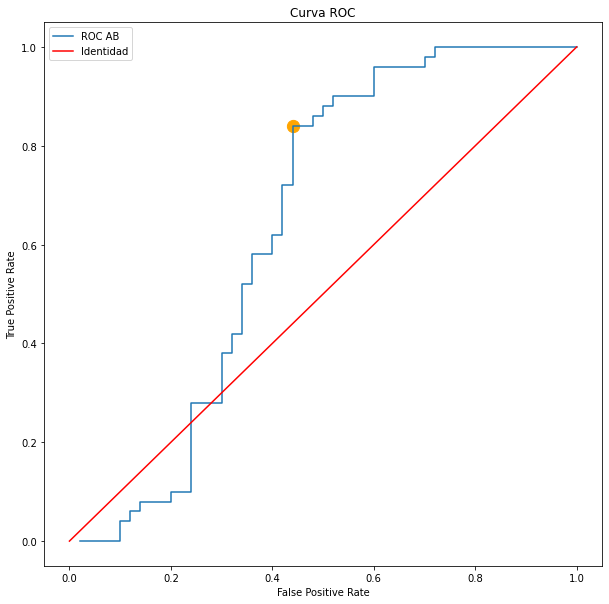

In [26]:
plt.figure(figsize=(10.0,10.0))
plt.plot(FPR,TPR, label='ROC AB')
x = np.arange(0,1.1,0.1)
plt.plot(x,x,color='red', label='Identidad')
plt.scatter(FPR[max_dist_idx[0][0]],TPR[max_dist_idx[0][0]], c='orange', s=150)
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### 2.2.4 Métricas de Calidad

In [29]:
FP_opt = FPR[max_dist_idx[0][0]]
TP_opt = TPR[max_dist_idx[0][0]]
TN_opt = TN[max_dist_idx[0][0]]
FN_opt = FN[max_dist_idx[0][0]]

print ("Accuracy: %2.3f"%((TP_opt+TN_opt)/(TP_opt + TN_opt + FP_opt + FN_opt)))
print ("Precision: %2.3f"%(TP_opt/(TP_opt+FP_opt)))
print ("F Score: %2.3f"%((2*TP_opt/(TP_opt+FP_opt))*TP_opt/(TP_opt/(TP_opt+FP_opt) + TP_opt)))

Accuracy: 0.503
Precision: 0.656
F Score: 0.737


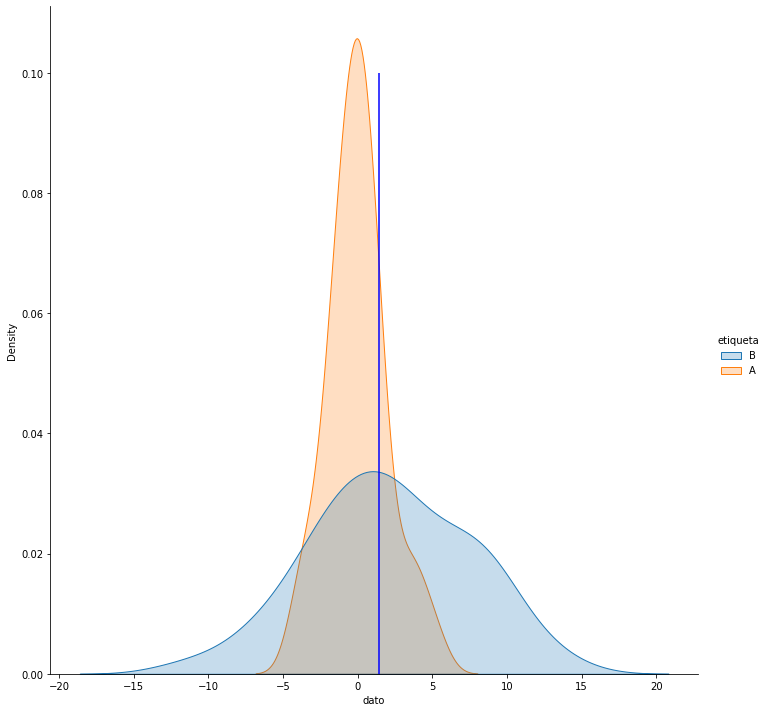

In [33]:
sns.displot(AB_df, x='dato', hue = 'etiqueta', kind = 'kde', fill = True, legend=True, height=10)
y = np.arange(0,0.1,0.01)
plt.vlines(AB_df.iloc[max_dist_idx[0][0],0],0.0,0.1,'b',label='mediana')
plt.show()

### 2.2.5 Separando las curvas

In [34]:
N = 50

mu_A = 0
sigma_A = 2

mu_B = 10
sigma_B = 5

In [35]:
A_df = pd.DataFrame(np.random.normal(loc = mu_A, scale = sigma_A, size=(N, 1)),columns=['dato'])
A_df['etiqueta'] = 'A'

B_df = pd.DataFrame(np.random.normal(loc = mu_B, scale = sigma_B, size=(N, 1)),columns=['dato'])
B_df['etiqueta'] = 'B'

In [37]:
AB_df = pd.concat([A_df,B_df])

In [38]:
AB_df.sort_values('dato',inplace=True, ignore_index=True)

In [39]:
TPR = []
FPR = []
TN = []
FN = []

TP = 0
FP = 0
for i in range(len(AB_df)):
  if (AB_df.iloc[i,1] == 'A'):
    TP +=1
  else:
    FP +=1

  TPR.append(TP/(len(AB_df)/2))
  FPR.append(FP/(len(AB_df)/2))
  TN.append((len(AB_df)/2) - FP)
  FN.append((len(AB_df)/2) - FP)
  
# Punto de mayor distancia
dist = abs((np.array(FPR) - np.array(TPR)) / np.sqrt(2))
max_dist_idx = np.argwhere(dist == np.amax(dist))
print(max_dist_idx[0][0])


48


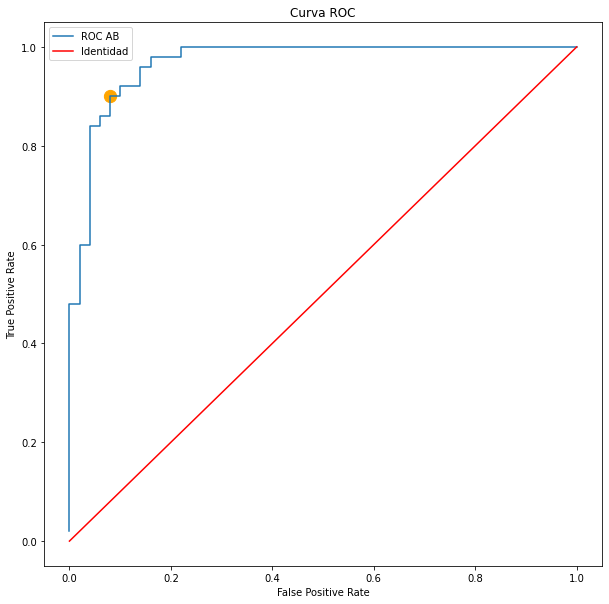

In [40]:
plt.figure(figsize=(10.0,10.0))
plt.plot(FPR,TPR, label='ROC AB')
x = np.arange(0,1.1,0.1)
plt.plot(x,x,color='red', label='Identidad')
plt.scatter(FPR[max_dist_idx[0][0]],TPR[max_dist_idx[0][0]], c='orange', s=150)
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
FP_opt = FPR[max_dist_idx[0][0]]
TP_opt = TPR[max_dist_idx[0][0]]
TN_opt = TN[max_dist_idx[0][0]]
FN_opt = FN[max_dist_idx[0][0]]

print ("Accuracy: %2.3f"%((TP_opt+TN_opt)/(TP_opt + TN_opt + FP_opt + FN_opt)))
print ("Precision: %2.3f"%(TP_opt/(TP_opt+FP_opt)))
print ("F Score: %2.3f"%((2*TP_opt/(TP_opt+FP_opt))*TP_opt/(TP_opt/(TP_opt+FP_opt) + TP_opt)))

Accuracy: 0.504
Precision: 0.918
F Score: 0.909


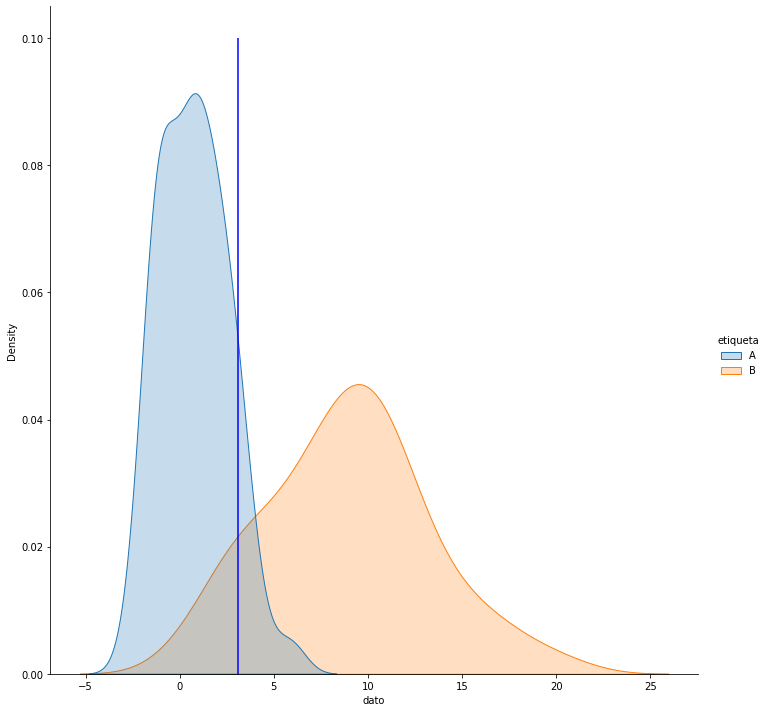

In [42]:
sns.displot(AB_df, x='dato', hue = 'etiqueta', kind = 'kde', fill = True, legend=True, height=10)
y = np.arange(0,0.1,0.01)
plt.vlines(AB_df.iloc[max_dist_idx[0][0],0],0.0,0.1,'b',label='mediana')
plt.show()

### 2.2.6 Conclusión

* Tanto la  forma de la curva ROC como las métricas de calidad son mejores cuando las distribuciones están más separadas porque es más fácil poder separar los datos de una distribución respecto de la otra. 
* Tanto la media como el sigma influye en esta parte porque además de separarlas, al tener un sigma alto hay mayor intersección entre las curvas.